In [1]:
'''
display_surfaceに関する処理
参考
https://qiita.com/mhangyo/items/76db7c6a6ebba6cf4330

dtypeに関する資料
http://discexuno.wp.xdomain.jp/machine-learning/python_fromfile_fromstring/
https://docs.python.org/3/library/struct.html

3Dfigure
https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-5-3d/

fft
https://zhuanlan.zhihu.com/p/27880690
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2 
from scipy.fftpack import fft,ifft
import os
import glob
from pylab import *
import math
import matplotlib.animation as animation




## 付録ーーデータの展開法

一つの実験についてのデータは四つのフォルダーに分けております。
そのうち、「Height」と書いてるフォルダーに変異データが入ってます。
そのフォルダーの中には縦方向（Y軸）の画素分のデータファイルがあります。
一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分重ねております。

つまり、X行、Y棚、Fフレームのデータポイントを見つけるには
Y個目のファイルを開いて、X×フレーム数（16666frames=500fps×33.3s）＋F　のインデックスでXYFのデータがあります。

データ自体は64bit doubleです。バイトオーダーはビッグエンディアンです (byte order: big endian)。ヘッダーはないです。

どうぞよろしくお願いします。
ライオン

他の設定に関する情報元(resolution/framerate/downsampling,etc)　　\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\Captures


#f = open(r"\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\test1_belly\Height\Height Row 0000.data",mode='rb')#0列目
#topo = np.fromfile(f, dtype='float64',sep='').reshape(256,20000) #float64の形で読み込むと，5120000の数列ができました．bellyの計測時間=20*1000msため，256*20000とreshapeしました．x軸上のサンプリング点が256個となります．



## 12/18 update
sensor side+display side　直線(left right二本　振動子につく直線とついていない直線)のfftを見たい まず直線上で決着付ける　振動が見えるなら，画像全体fftを見る


## 01/22 update
振動子の位置が判断しづらいため，color mapを調整してみる

In [2]:
#path = "//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test2_display_surface//Height" #display上の計測データ元　
path = "C://Users//huaju//Documents//data//fourD_sensor//20191101//test2_display//Height" #display上の計測データ元　

files = os.listdir(path) #all files in the faulder　縦方向(y軸)のデータファイル
s = []
xnum = 512
T = 16666
ynum = 0

#os.chdir("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test2_display_surface//Height") #local()関数を利用するためのコードです
os.chdir("C://Users//huaju//Documents//data//fourD_sensor//20191101//test2_display//Height") #local()関数を利用するためのコードです

print("reading files")
for file in glob.glob("*.data"): 
    f = open(path + "//" + file ,mode='rb')#n列目　rb= read binary
    name = 'topo'+str(ynum)  #一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分のデータを変数topo+str(n)に入れます
    locals()['topo'+str(ynum)]= np.fromfile(f, dtype='>d').reshape(xnum,T) 
    # https://docs.python.org/3/library/struct.html
    # ">" means big endian, "d" means double. 8532992の数列ができました．
    #print(file,"has ended")
    ynum = ynum + 1 
     
print(ynum ,"y-axis files") #y軸上サンプリング点の数を数えます--505個


reading files
505 y-axis files


In [3]:
'''
color mapのアニメーション
'''


"""

# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k
#print(f(511,504,16666-1))
#print(f(505,0,0))


# X, Y value
x = np.linspace(0,xnum-1,xnum)
y = np.linspace(0,ynum-1,ynum)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個


#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]
Z = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行


print(" color map start")
for t in range(T):
    if t % 100 == 0:
        for y in range(ynum):#y軸
            for x in range(xnum):#x軸
                #print(x,y,t)
                Z[y][x] = f(x,y,t)     
        Z_array = np.array(Z)# turn list into array
        
       # color mapを作成する
        plt.pcolormesh(X, Y, Z_array, cmap='jet',vmin=-3,vmax=3) 
        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 

        plt.xlabel('X', fontsize=18)
        plt.ylabel('Y', fontsize=18)
        plt.title("T = %s ms"% (t))
        plt.axes().set_aspect('equal')

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test2_display_surface//" + str(t) + ".png")
        plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test2_display//global//" + str(t) + ".png")
        #plt.show()
        plt. close()
    else:
        continue

        
print("color map end")

"""



'\n\n# (x,y,t)のデータを取り出すための関数 \nnames = locals()\ndef f(x,y,t): \n    k = names[\'topo\'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します\n    return k\n#print(f(511,504,16666-1))\n#print(f(505,0,0))\n\n\n# X, Y value\nx = np.linspace(0,xnum-1,xnum)\ny = np.linspace(0,ynum-1,ynum)\nX,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個\n\n\n#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]\nZ = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行\n\n\nprint(" color map start")\nfor t in range(T):\n    if t % 100 == 0:\n        for y in range(ynum):#y軸\n            for x in range(xnum):#x軸\n                #print(x,y,t)\n                Z[y][x] = f(x,y,t)     \n        Z_array = np.array(Z)# turn list into array\n        \n       # color mapを作成する\n        plt.pcolormesh(X, Y, Z_array, cmap=\'jet\',vmin=-3,vmax=3) \n        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 \n\n        plt.xlabel

In [4]:
'''
color map 2019 version
'''



'''
# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k
#print(f(511,504,16666-1))
#print(f(505,0,0))


# X, Y value
x = np.linspace(0,xnum-1,xnum)
y = np.linspace(0,ynum-1,ynum)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個


#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]
Z = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行


print(" color map start")
for t in range(T):
    if t  == 8000:
        for y in range(ynum):#y軸
            for x in range(xnum):#x軸
                #print(x,y,t)
                Z[y][x] = f(x,y,t)     
        Z_array = np.array(Z)# turn list into array
        
       # color mapを作成する
        plt.pcolormesh(X, Y, Z_array, cmap='jet',vmin=-3,vmax=3) 
        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 

        plt.xlabel('X', fontsize=18)
        plt.ylabel('Y', fontsize=18)
        plt.title("T = %s ms"% (t))
        plt.axes().set_aspect('equal')

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test2_display_surface//" + str(t) + ".png")
        #plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test2_display//global//" + str(t) + ".png")
        plt.show()
        plt. close()
    else:
        continue

        
print("color map end")
'''


'\n# (x,y,t)のデータを取り出すための関数 \nnames = locals()\ndef f(x,y,t): \n    k = names[\'topo\'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します\n    return k\n#print(f(511,504,16666-1))\n#print(f(505,0,0))\n\n\n# X, Y value\nx = np.linspace(0,xnum-1,xnum)\ny = np.linspace(0,ynum-1,ynum)\nX,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個\n\n\n#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]\nZ = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行\n\n\nprint(" color map start")\nfor t in range(T):\n    if t  == 8000:\n        for y in range(ynum):#y軸\n            for x in range(xnum):#x軸\n                #print(x,y,t)\n                Z[y][x] = f(x,y,t)     \n        Z_array = np.array(Z)# turn list into array\n        \n       # color mapを作成する\n        plt.pcolormesh(X, Y, Z_array, cmap=\'jet\',vmin=-3,vmax=3) \n        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 \n\n        plt.xlabel(\'X

 color map start


C:\Users\huaju\Miniconda3\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


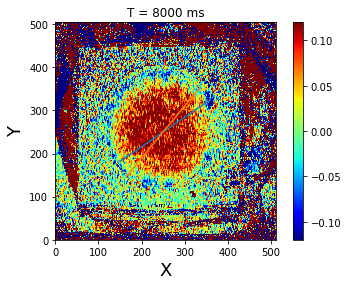

color map end


In [5]:
'''
color map 2020 version
'''




# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k



# X, Y value
x = np.linspace(0,xnum-1,xnum)
y = np.linspace(0,ynum-1,ynum)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸512個， y軸505個


#Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]
Z = [[0 for row in range(xnum)] for col in range(ynum)]  #Z--x列y行    e.g. arr2D = [[ 0 for col in range(10) ] for row in range(4) ]-- 10列4行


print(" color map start")
for t in range(T):
    if t  == 8000:
        for y in range(ynum):#y軸
            for x in range(xnum):#x軸
                #print(x,y,t)
                Z[y][x] = f(x,y,t)     
        Z_array = np.array(Z)# turn list into array
        
        
        # color mapを作成する
        plt.pcolormesh(X, Y, Z_array, cmap='jet',vmin=-0.12,vmax=0.12) 
        pp=plt.colorbar (orientation="vertical") # カラーバーの表示 
        
        x = np.arange(150,360)
        y = 0.6818181818181818 * x + 79.54545454545455 #(140,175)to(360,325)
        plt.plot(x,y)
        x = np.arange(165,335)
        y = 1.2058823529411764 * x - 51.470588235294116 #(165,147.5)to(335,352.5)
        plt.plot(x,y)

        plt.xlabel('X', fontsize=18)
        plt.ylabel('Y', fontsize=18)
        plt.title("T = %s ms"% (t)) 
        plt.axes().set_aspect('equal')

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test2_display_surface//" + str(t) + ".png")
        #plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test2_display//global//" + str(t) + ".png")
        plt.show()
        plt. close()
    else:
        continue

        
print("color map end")



16666


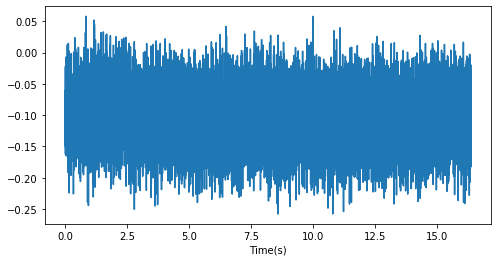

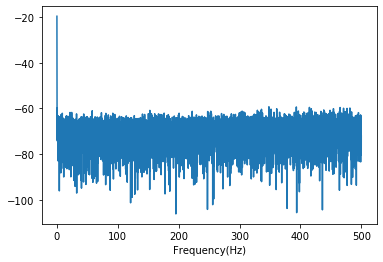

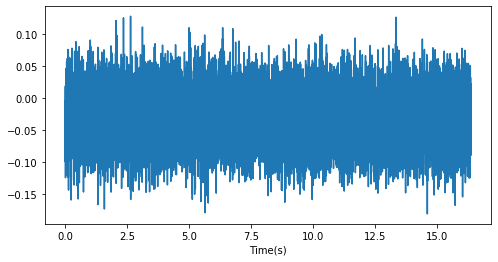

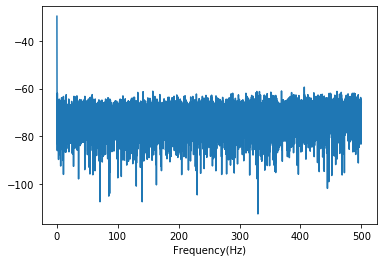

fft analysis end


In [6]:
"""
直線(left right二本　振動子につく直線とついていない直線)のfftを見たい まず直線上で決着付ける　振動が見えるなら，画像全体fftを見る


2020/02/07 update 
No.1   x = np.arange(150,360)
       y = 0.6818181818181818 * x + 79.54545454545455 #(140,175)to(360,325)
No.2  x = np.arange(165,335)
      y = 1.2058823529411764 * x - 51.470588235294116 #(165,147.5)to(335,352.5)
"""
# (x,y,t)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k

sampling_rate = 1000
fft_size = 16384
t = np.arange(0, fft_size/sampling_rate, 1/sampling_rate) 
x = zeros(T)
print(len(x))
#print(x[0])


# point (360,325)
for timing in range(T):
    #print(f(360,325,timing) )
    x[timing] = f(360,325,timing)    
xs = x[:fft_size]
#print(len(xs))
xf = np.fft.rfft(xs)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))

plt.figure(figsize=(8,4))
plt.plot(t, xs)
plt.xlabel("Time(s)")
plt.show()
plt.plot(freqs, xfp)
plt.xlabel("Frequency(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()

# point (335,352.5)
for timing in range(T):
    #print(f(360,325,timing) )
    x[timing] = f(335,352,timing)    
xs = x[:fft_size]
#print(len(xs))
xf = np.fft.rfft(xs)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))

plt.figure(figsize=(8,4))
plt.plot(t, xs)
plt.xlabel("Time(s)")
plt.show()
plt.plot(freqs, xfp)
plt.xlabel("Frequency(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()


print("fft analysis end")


In [25]:
"""
No.1   x = np.arange(150,360)
       y = 0.6818181818181818 * x + 79.54545454545455 #(140,175)to(360,325)
No.2  x = np.arange(165,335)
      y = 1.2058823529411764 * x - 51.470588235294116 #(165,147.5)to(335,352.5)
"""

print(" wave analysis start")
""" Line 1
# Lin1 y = 0.6818181818181818 * x + 79.54545454545455 #(140,175)to(360,325)
x = np.arange(140,360)
y = 0.6818181818181818 * x + 79.54545454545455 #(140,175)to(360,325)
z = zeros(220)
#print(len(y))
#print(len(z))




for t in range(10000,T):
    #if t  == 8000:
        for x in range(140,360):#x軸
            z[x-140] = f(x,round(0.68 * x + 79.54),t) 
            #print(z[x-140])
        
        x = np.arange(140,360)
        plt.plot(x,z)
        plt.xlabel('X ', fontsize=18)
        plt.ylabel('Z', fontsize=18)
        plt.ylim(-1,2.5)
        plt.title("y = 0.68 * x + 79.54, T = %s ms "% (t)) 

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor//narrow//" + str(t) + ".png")
        plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test2_display//wave//" + str(t) + ".png")
        #plt.show()
        plt. close()
    #else:
     #   continue
"""

# Line2 y = 1.2058823529411764 * x - 51.470588235294116 #(165,147.5)to(335,352.5)
z = zeros(170)
for t in range(10000,T):
    #if t  == 8000:
        for x in range(165,335):#x軸
            z[x-165] = f(x,round(1.2 * x -51.47),t) 
            #print(z[x-140])
        
        x = np.arange(165,335)
        plt.plot(x,z)
        plt.xlabel('X ', fontsize=18)
        plt.ylabel('Z', fontsize=18)
        plt.ylim(-1,2.5)
        plt.title("y = 0.68 * x + 79.54, T = %s ms "% (t)) 

        #print(t)
        #plt.savefig("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//Captures//animation//color_map//test3_sensor//narrow//" + str(t) + ".png")
        plt.savefig("C://Users//huaju//Documents//data//fourD_sensor//20191101//Captures//animation//color_map//test2_display//wave2//" + str(t) + ".png")
        #plt.show()
        plt. close()
    #else:
        #continue

print("wave analysis end")

 wave analysis start
wave analysis end
